# Force-Directed Layout

You will implement the Force-Directed Graph Layout algorithm from Fruchterman and Reingold, developed in the 1990s (at the University of Illinois at Urbana Champaign :). The original paper can be found at: https://onlinelibrary.wiley.com/doi/epdf/10.1002/spe.4380211102, but you should be able to complete this assignment without having read it. You should view the lecture on force directed layouts or at least read through the slides.

The pseudocode for the Fruchterman-Reingold algorithm is also shown below:

<img src="fdl.png" width=480px>

This assignment will use the NetworkX library, which is a Python package supporting data structures and functions for computations on graphs. You can find documentation at https://networkx.org/documentation/stable/reference/index.html.
You do not need to read through the documentation before attempting the assignment. If you come across a function call you do not understand or need to see some examples of how to use the API, feel free to consult those webpages. Hopefully you can complete the assignment solely based on the explanations and code in this notebook.

As usual, we will begin by importing the necessary modules.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
from random import random
from numpy import arange

Now let's set the dimensions of our canvas. 

In [2]:
W = 1    # Width of the frame
L = 1    # Length of the frame
area = W*L

## TO-DO: Calculate attractive force between two vertices
Here is your first to-do. Complete the function below to calculate the magnitude of the attractive force between two vertices. 

The parameters of this function are:
- `d`: the distance between the two vertices
- `k`: the constant k = C*sqrt(area/# of vertices)

In [3]:
# Attractive force calculation
def f_a(d,k):
    # YOUR CODE HERE
    return (d**2)/k
    

In [4]:
### Please DO NOT hard-code the answers as we will also be using hidden test cases when grading your submission.

np.testing.assert_allclose(f_a(4,3), 5.33, atol=0.01,rtol=0)
np.testing.assert_allclose(f_a(3,3.4), 2.65, atol=0.01,rtol=0)
np.testing.assert_allclose(f_a(4,3.4), 4.71, atol=0.01,rtol=0)

## TO-DO: Calculate repulsive force between two vertices
Complete the function below to calculate the magnitude of the repulsive force between two vertices. 

The parameters of this function are:
- `d`: the distance between the two vertices
- `k`: the constant k = C*sqrt(area/# of vertices)

In [5]:
# Repulsive force calculation
def f_r(d,k):
    # YOUR CODE HERE
    return (k**2)/d

In [6]:
### Please DO NOT hard-code the answers as we will also be using hidden test cases when grading your submission.

np.testing.assert_allclose(f_r(4,3), 2.25, atol=0.01,rtol=0)
np.testing.assert_allclose(f_r(3,3.4), 3.85, atol=0.01,rtol=0)
np.testing.assert_allclose(f_r(3,4), 5.33, atol=0.01,rtol=0)

We have provided skeleton code for the rest of the algorithm below. To make things easier for you, we have provided the code to calculate the repulsive forces in the graph and to limit the maximum displacement. That means you only need to complete the function `calculate_attractive_forces()`, which is defined later.

We use the NetworkX API (https://networkx.org/documentation/stable//release/api_1.9.html) to generate and represent a graph `G`. 

For a graph G, using the NetworkX API, you can

1. Iterate over nodes with: `for v in G.nodes()`.
2. Iterate over edges with v and u being keys to the two vertices that joined by the edge in G with: `for v,u in G.edges()`.
3. Access the x coordinate of v with: `G.nodes[v]['x']`; Using the key 'y' will access the y coordinate.
4. You should accumulate displacements from forces for a vertex v by accumulating the displacements in:
	`G.nodes[v]['dx']`
	`G.nodes[v]['dy']`
    
The parameters of `fruchterman_reingold()` are:
- `G`: a NetworkX graph
- `iteration`: the number of iterations

This function will return `pos`, a dictionary of (vertex, position) pairs.

In [9]:
# If you need to modify this function for debugging purposes, you can simply copy and paste this function into a new cell.
def fruchterman_reingold(G,iteration):
   
    area = W*L
    k = math.sqrt(area/nx.number_of_nodes(G))
    
    t = W/2
    dt = t/(iteration+1)

    for i in range(iteration):
        #print(i, " of ", iteration)
        
        # ALREADY COMPLETED. SEE CODE CELL BELOW.
        G = calculate_repulsive_forces(G, k)
       
        # COMPLETE THIS FUNCTION LATER
        G = calculate_attractive_forces(G, k)
        
        # Limit the maximum displacement to the temperature t
        # and then prevent from being displaced outside frame
        for v in G.nodes():
            dx = G.nodes[v]['dx']
            dy = G.nodes[v]['dy']
            disp = math.sqrt(dx*dx+dy*dy)
            if disp != 0:
                d = min(disp,t)/disp
                x = G.nodes[v]['x'] + dx*d
                y = G.nodes[v]['y'] + dy*d
                x =  min(W,max(0,x)) - W/2
                y =  min(L,max(0,y)) - L/2
                G.nodes[v]['x'] = min(math.sqrt(W*W/4-y*y),max(-math.sqrt(W*W/4-y*y),x)) + W/2
                G.nodes[v]['y'] = min(math.sqrt(L*L/4-x*x),max(-math.sqrt(L*L/4-x*x),y)) + L/2

        # Cooling
        t -= dt

    pos = {}
    for v in G.nodes():
        pos[v] = [G.nodes[v]['x'],G.nodes[v]['y']]
        
    plt.close()
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])
    plt.axis('off')
        
    return pos


Below is the first part of the Fruchterman-Reingold algorithm, which will calculate the repulsive forces for an entire graph `G`.

The parameters of `calculate_repulsive_forces` are:
- `G`: a NetworkX graph
- `k`: the constant k = C*sqrt(area/# of vertices)

This function will return the updated graph `G` with accumulated displacements stored in `G.nodes[v]['dx']` and `G.nodes[v]['dy']`.

In [7]:
def calculate_repulsive_forces(G, k):       
    for v in G.nodes():
        G.nodes[v]['dx'] = 0
        G.nodes[v]['dy'] = 0
        for u in G.nodes():
            if v != u:
                dx = G.nodes[v]['x'] - G.nodes[u]['x']
                dy = G.nodes[v]['y'] - G.nodes[u]['y']
                delta = math.sqrt(dx*dx+dy*dy)
                if delta != 0:
                    d = f_r(delta,k)/delta
                    G.nodes[v]['dx'] += dx*d
                    G.nodes[v]['dy'] += dy*d
    return G

## TO-DO: Calculate attractive forces
Complete the function below to calculate the attractive forces for the entire graph `G`.

The parameters of `calculate_attractive_forces` are:
- `G`: a NetworkX graph
- `k`: the constant k = C*sqrt(area/# of vertices)

This function will return the updated graph `G` with accumulated displacements stored in `G.nodes[v]['dx']` and `G.nodes[v]['dy']`.

In [8]:
def calculate_attractive_forces(G, k):       
    # YOUR CODE HERE
    
    #iterate through edges
    for v, u in G.edges():
        #calculate distance between two nodes
        dx = G.nodes[v]['x'] - G.nodes[u]['x']
        dy = G.nodes[v]['y'] - G.nodes[u]['y']
        delta = math.sqrt(dx*dx+dy*dy)
        
        #Calculate updated node position
        d = f_a(delta,k)/delta
        G.nodes[v]['dx'] -= dx*d
        G.nodes[v]['dy'] -= dy*d
        G.nodes[u]['dx'] += dx*d
        G.nodes[u]['dy'] += dy*d
    return G
        
    

In [10]:
### Please DO NOT hard-code the answers as we will also be using hidden test cases when grading your submission.
N = 5
G = nx.cycle_graph(N)

G.nodes[0]['x'] = 0.8168184889480099
G.nodes[0]['y'] = 0.5311428534216505
G.nodes[1]['x'] = 0.6654594641114429
G.nodes[1]['y'] = 0.7842081286602168
G.nodes[2]['x'] = 0.9229503471222402
G.nodes[2]['y'] = 0.21495774524514744
G.nodes[3]['x'] = 0.1353894225040374
G.nodes[3]['y'] = 0.9657448268419787
G.nodes[4]['x'] = 0.037138912320340944
G.nodes[4]['y'] = 0.578448424341083

for v in G.nodes():
    G.nodes[v]['dx'] = 0
    G.nodes[v]['dy'] = 0

k = math.sqrt(area/nx.number_of_nodes(G))

G_a = calculate_attractive_forces(G, k)

np.testing.assert_allclose(G_a.nodes[0]['dx'], -1.46, atol=0.01,rtol=0)
np.testing.assert_allclose(G_a.nodes[0]['dy'], 0.25, atol=0.01,rtol=0)
np.testing.assert_allclose(G_a.nodes[1]['dx'], 0.46, atol=0.01,rtol=0)
np.testing.assert_allclose(G_a.nodes[1]['dy'], -0.96, atol=0.01,rtol=0)
np.testing.assert_allclose(G_a.nodes[2]['dx'], -2.28, atol=0.01,rtol=0)
np.testing.assert_allclose(G_a.nodes[2]['dy'], 2.62, atol=0.01,rtol=0)

Now, let's run the entire algorithm on the graph and draw the result.

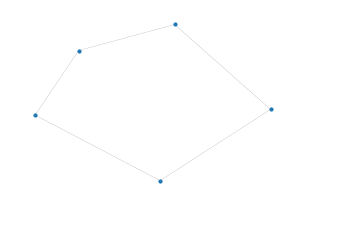

In [11]:
pos = fruchterman_reingold(G,200)
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)

Here is the image of a randomly generated cycle with 5 vertices:
<img src="before.png" width=360px>

Here is the image of the graph processed by the Fruchterman-Reingold algorithm. If your code is working properly, you should see something like this.
<img src="after.png" width=360px>


Finally, we will randomly generate a new graph with 30 vertices and run the Fruchterman-Reingold algorithm on that.

Please note that generating the result image may take a couple seconds.

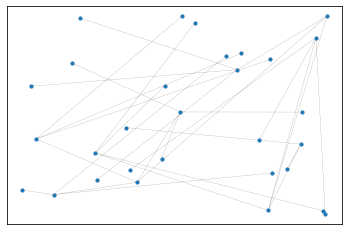

In [12]:
G = nx.full_rary_tree(3,30)
# initial position
for v in nx.nodes(G):
    G.nodes[v]['x'] = W*random()
    G.nodes[v]['y'] = L*random()
    
pos = {}
for v in G.nodes():
    pos[v] = [G.nodes[v]['x'],G.nodes[v]['y']]
    
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)

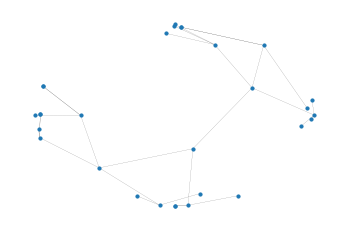

In [13]:
pos = fruchterman_reingold(G,1000)

plt.close()
plt.ylim([-0.1,1.1])
plt.xlim([-0.1,1.1])
plt.axis('off')
nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)

If your implementation is correct, you will see a more aesthetically-pleasing graph image, such as this one below (doesn't have to look the same as this one):
<img src="result.png" width=360px>
